c:\Users\AmonS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\AmonS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\AmonS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted CO2 emission: [107.2087328]


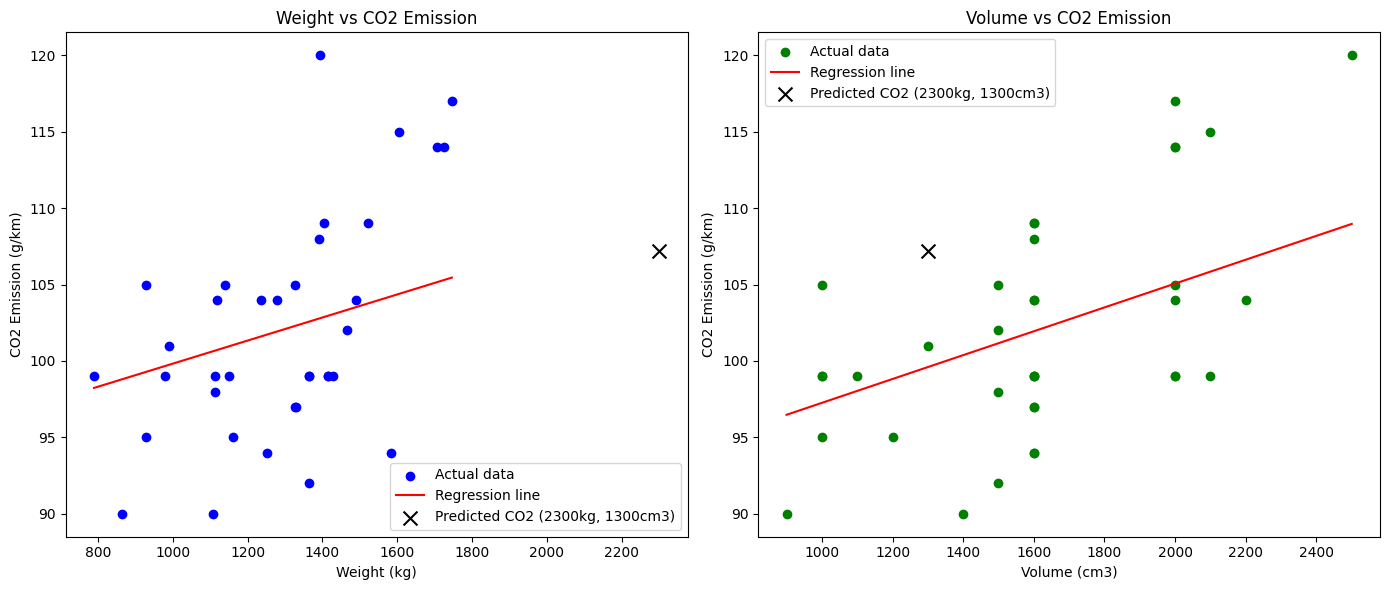

In [12]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data.csv")

# Independent and dependent variables
X = df[['Weight', 'Volume']]
y = df['CO2']

# Create linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Predict the CO2 emission of a car where the weight is 2300kg and the volume is 1300cm3
predictedCO2 = regr.predict([[2300, 1300]])

print("Predicted CO2 emission:", predictedCO2)

# Generate predicted values for regression lines
weight_values = np.linspace(df['Weight'].min(), df['Weight'].max(), 100)
volume_values = np.linspace(df['Volume'].min(), df['Volume'].max(), 100)

# Generate CO2 predictions based on weight and volume separately
# Broadcast np.mean(df['Volume']) to match the shape of weight_values
predicted_CO2_weight = regr.predict(np.column_stack([weight_values, np.full(weight_values.shape, np.mean(df['Volume']))]))
# Broadcast np.mean(df['Weight']) to match the shape of volume_values
predicted_CO2_volume = regr.predict(np.column_stack([np.full(volume_values.shape, np.mean(df['Weight'])), volume_values]))

# Plotting

# 1. Scatter plot of Weight vs CO2 and Volume vs CO2 with regression lines
plt.figure(figsize=(14, 6))

# Weight vs CO2 with regression line
plt.subplot(1, 2, 1)
plt.scatter(df['Weight'], df['CO2'], color='blue', label='Actual data')
plt.plot(weight_values, predicted_CO2_weight, color='red', label='Regression line')
plt.scatter(2300, predictedCO2, color='black', label='Predicted CO2 (2300kg, 1300cm3)', marker='x', s=100)
plt.xlabel('Weight (kg)')
plt.ylabel('CO2 Emission (g/km)')
plt.title('Weight vs CO2 Emission')
plt.legend()

# Volume vs CO2 with regression line
plt.subplot(1, 2, 2)
plt.scatter(df['Volume'], df['CO2'], color='green', label='Actual data')
plt.plot(volume_values, predicted_CO2_volume, color='red', label='Regression line')
plt.scatter(1300, predictedCO2, color='black', label='Predicted CO2 (2300kg, 1300cm3)', marker='x', s=100)
plt.xlabel('Volume (cm3)')
plt.ylabel('CO2 Emission (g/km)')
plt.title('Volume vs CO2 Emission')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[0.00755095 0.00780526]


The result array represents the coefficient values of weight and volume.

Weight: 0.00755095
Volume: 0.00780526

These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

I think that is a fair guess, but let test it!

We have already predicted that if a car with a 1300cm3 engine weighs 2300kg, the CO2 emission will be approximately 107g.

What if we increase the weight with 1000kg?

In [15]:
input_data = pd.DataFrame([[3300, 1300]], columns=['Weight', 'Volume'])
predictedCO2 = regr.predict(input_data)

print("Predicted CO2 emission:", predictedCO2)

Predicted CO2 emission: [114.75968007]


We have predicted that a car with 1.3 liter engine, and a weight of 3300 kg, will release approximately 115 grams of CO2 for every kilometer it drives.

Which shows that the coefficient of 0.00755095 is correct:

107.2087328 + (1000 * 0.00755095) = 114.75968
